Printing hello world

In [1]:
print("Hello world!\n")

Hello world!


Adding two numbers

In [2]:
# julia cannot take inputs from jupyter, assign variables "normally"

x = 1
y = 3

println("Enter x: \n")
# x = readlines()
println("Enter y: \n")
# y = readlines()
x + y

Enter x: 

Enter y: 



4

Count ten non-negative even integers

In [3]:
for i in 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


Compare 2 values to see which is better

In [4]:
# ditto
x = 5
y = 6

if x > y
    return "x is larger"
elseif x == y
    return "both are equal"
else
    return "y is larger"
end

"y is larger"

*ADDITIONAL ACTIVITIES*

In [5]:
# 2
x::Float64 = 1./2 # As it turns out, Julia is a little smarter than C when it comes to clarity
print(x)
x = 1/2
print(x)

ErrorException: syntax: invalid syntax "1./"; add space(s) to clarify

In [6]:
# 3
# regarding scanning in, ditto
# i tells whether or not to give the positive (1) or negative (2) result

function quadratic(a, b, c, i::Int64)
    discrim::Int64 = (b^2) - 4 * a * c

    if discrim > 0
        ans = zeros(Float64, 2)
        # quadratic equation gives 2 solutions
        ans[1] = -b + sqrt((b^2) - (4 * a * c)) / (2 * a)
        ans[2] = -b - sqrt((b^2) - (4 * a * c)) / (2 * a)
        
        ans[i]
    elseif discrim == 0
        ans = -b / (2 * a)
    else
        ans = zeros(ComplexF64, 2)
        # quadratic equation gives 2 solutions
        ans[1] = -b + sqrt(Complex((b^2) - (4 * a * c))) / (2 * a)
        ans[2] = -b - sqrt(Complex((b^2) - (4 * a * c))) / (2 * a)

        ans[i]
    end
end

quadratic (generic function with 1 method)

In [7]:
println(quadratic(5,2,1,2))
println(quadratic(5,2,1,1))

println(quadratic(5,10,1,2))
println(quadratic(5,10,1,1))

-2.0 - 0.4im
-2.0 + 0.4im
-10.894427190999917
-9.105572809000083


In [8]:
# bonus round: latexify
using Latexify
latexify(quadratic(5,2,1,1))

L"$-2.0+0.4\mathit{i}$"

In [9]:
# bonus round 2: tell if the discriminant is positive or negative with the power of multiple dispatch

function telldiscrim(discrim::ComplexF64)
    println("negative")
end

function telldiscrim(discrim::Float64)
    println("positive or greater than 0")
end

telldiscrim (generic function with 2 methods)

In [10]:
telldiscrim(quadratic(1,5,1,2))
telldiscrim(quadratic(5,2,3,2))

positive or greater than 0
negative


  0.006128 seconds (20.90 k allocations: 1.056 MiB, 99.64% compilation time)


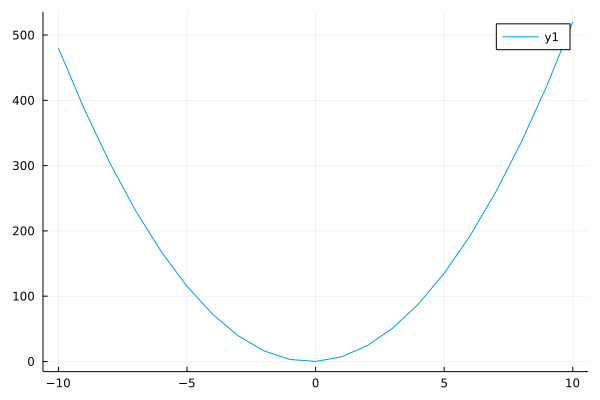

In [11]:
# bonus round 3: plotting

function polynomial(val1,
                    val2, 
                    val3, 
                    start, 
                    stop, 
                    step)

    yvals = zeros(Float64, 0) # make an empty array (0 elements) with a type Float64

#   For a scaled up version, I'd use a 32 bit float because Julia can be ran directly on the GPU.
#   This means that it inherits any hardware GPU limitations, namely that consumer-grade GPU's
#   cannot do double precision (Float64) computations. CUDA, the defacto option, inherits this too.

    for x in start:stop # iterators are very nice
        push!(yvals, val1*x^2 + val2*x + val3) # push y values into the array
    end

    yvals # return is optional
end

#############################################################
#                                                           #
#               INITIALIZING GRAPHING VARIABLES             #
#                                                           #
#############################################################

# graph features
start = -10
stop = 10
step = .00001

# polynomial values
a = 5
b = 2
c = 0

# Use @show to print out entire objects without needing stupid loops

x = start:stop # use the "range" type to specify x-axis
@time y = polynomial(a, b, c, start, stop, step) # generate the polynomial


using Plots
gr() # use the gr backend
plot(x,y) # finally plot